In [15]:
from ultralytics import YOLO
from IPython.display import Image, display


data_yaml = '../dataset/datafinetuningmde.yaml'
dataset_path = '../dataset'

In [ ]:
#cargando modelo yolo pre-entrenado y haciendole finetunning con imagenes de medellin
model = YOLO('noHelmetDetection/exp3/weights/best.pt')

model.train(
    data=data_yaml,
    epochs=1,
    imgsz=640,
    batch=16,
    name="expFinetuneMedellin",
    pretrained=True,
    resume=False
)

In [9]:
# cargar modelo
model = YOLO('noHelmetDetection/expFinetuneMedellin/weights/best.pt')

In [10]:
metrics_test = model.val(data=data_yaml, split="val", imgsz=640)

Ultralytics 8.3.147  Python-3.10.16 torch-2.7.0+cpu CPU (Intel Core(TM) i7-9750H 2.60GHz)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 838.159.6 MB/s, size: 94.4 KB)


val: Scanning D:\GIT\NoHelmetDetection\dataset\medellin\labels\val.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]

val: D:\GIT\NoHelmetDetection\dataset\medellin\images\val\frame_0000.jpg: 10 duplicate labels removed
val: D:\GIT\NoHelmetDetection\dataset\medellin\images\val\frame_0094.jpg: 3 duplicate labels removed



c:\Users\123\anaconda3\envs\no-helmet-detection\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]


                   all         38        235      0.904      0.722       0.83      0.662
             DNoHelmet         13         13      0.928      0.769      0.852       0.68
               DHelmet         34        139      0.961      0.895      0.971      0.769
       DHelmetP1Helmet         30         75      0.956      0.868      0.973      0.767
DNoHelmetP1NoHelmetP2NoHelmet          1          1      0.808          1      0.995      0.796
     DHelmetP1NoHelmet          2          2          1          0      0.249      0.171
   DNoHelmetP1NoHelmet          5          5       0.77        0.8      0.938       0.79
Speed: 2.0ms preprocess, 86.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\val3


In [13]:
# Predice sobre una imagen de prueba
results = model.predict(source=f"{dataset_path}/birmania/images/val/bago_highway_1_001.jpg", save=True)


image 1/1 d:\GIT\NoHelmetDetection\src\..\dataset\birmania\images\val\bago_highway_1_001.jpg: 640x640 2 DNoHelmets, 1 DHelmetP1Helmet, 1 DNoHelmetP1NoHelmet, 185.7ms
Speed: 3.9ms preprocess, 185.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2


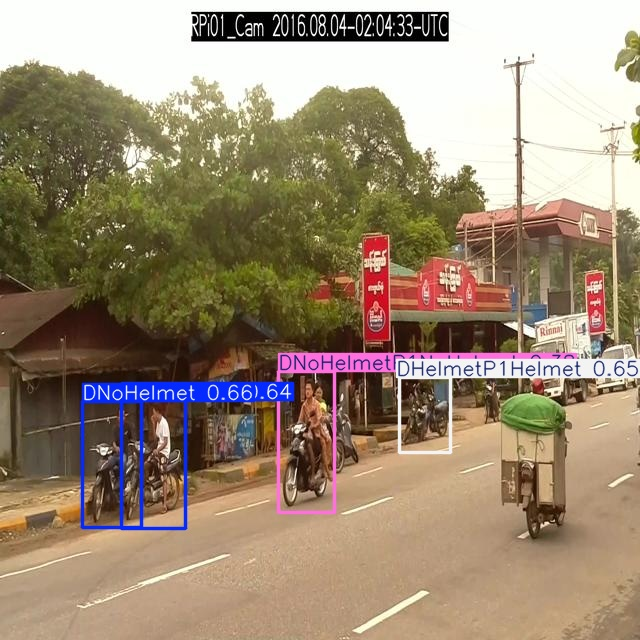

In [16]:
display(Image(filename='runs/detect/predict2/bago_highway_1_001.jpg'))

In [17]:
# Predice sobre una imagen de prueba
results = model.predict(source=f"{dataset_path}/medellin/images/val/frame_0152.jpg", save=True)


image 1/1 d:\GIT\NoHelmetDetection\src\..\dataset\medellin\images\val\frame_0152.jpg: 640x640 1 DNoHelmet, 5 DHelmets, 145.4ms
Speed: 3.5ms preprocess, 145.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2


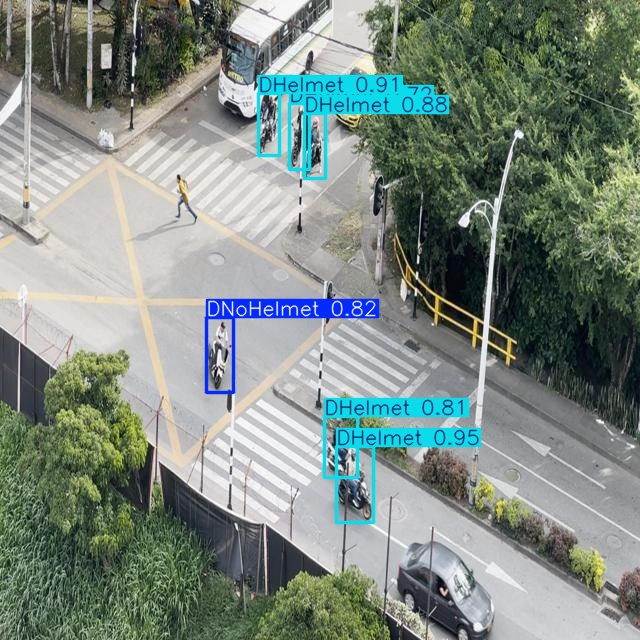

In [18]:
display(Image(filename='runs/detect/predict2/frame_0152.jpg'))